In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Define function and Gradient

In [2]:
def func(x):
    if x < 1:
        return 25*x**2
    elif 1<= x <= 2:
        return x**2 + 48*x - 24
    else:
        return 25*x**2 - 48*x + 72
    
def gradient(x):
    if x < 1:
        return 50*x
    elif 1<= x <= 2:
        return 2*x + 48
    else:
        return 50*x - 48

# Gradient Descent

In [3]:
# gradient descent
alpha = 1 / 50
x=3
k=0
iterations_GD = [0]
values_GD = [func(x)]
while abs(gradient(x)) > 1e-3:
    dk = gradient(x)
    x = x - alpha * dk
    k += 1
    values_GD.append(func(x))
    iterations_GD.append(k)
    print('{}th iteration: gradient is {}, x is {}'.format(k, dk, x))

1th iteration: gradient is 102, x is 0.96
2th iteration: gradient is 48.0, x is 0.0


# Heavy Ball Method

In [4]:
# heavy ball method
alpha = 0.017 #0.017
beta = 0.007 #0.007
x = [3,3]
k=1
iterations_HBM = [0]
values_HBM = [func(x[k])]
while abs(gradient(x[k])) > 1e-3:
    dk = gradient(x[k])
    x.append(x[k] - alpha * dk + beta * (x[k] - x[k-1]))
    k += 1
    iterations_HBM.append(k-1)
    values_HBM.append(func(x[k]))
    print('{}th iteration: gradient is {}, x is {}'.format(k-1, dk, x[k]))

1th iteration: gradient is 102, x is 1.2659999999999998
2th iteration: gradient is 50.532, x is 0.3948179999999998
3th iteration: gradient is 19.74089999999999, x is 0.05312442599999996
4th iteration: gradient is 2.656221299999998, x is 0.005576808881999993
5th iteration: gradient is 0.27884044409999964, x is 0.0005036880124739991
6th iteration: gradient is 0.025184400623699955, x is 4.0041355784417916e-05
7th iteration: gradient is 0.002002067789220896, x is 2.7606767708356174e-06


# Nesterov’s method

In [5]:
# Nesterov’s method
alpha = 1 / 50
x = [3,3]
k=1
iterations_NM = [0]
values_NM = [func(x[k])]
while abs(gradient(x[k])) > 1e-3:
    beta = (k-1)/(k+2)
    pk = beta*(x[k]-x[k-1])
    dk = gradient(x[k] + pk)
    x.append(x[k] + pk - alpha * dk)
    k += 1
    iterations_NM.append(k-1)
    values_NM.append(func(x[k]))
    print('{}th iteration: gradient is {}, x is {}'.format(k-1, gradient(x[k]), x[k]))

1th iteration: gradient is 48.0, x is 0.96
2th iteration: gradient is 0.0, x is 0.0


# Draw plot for three methods

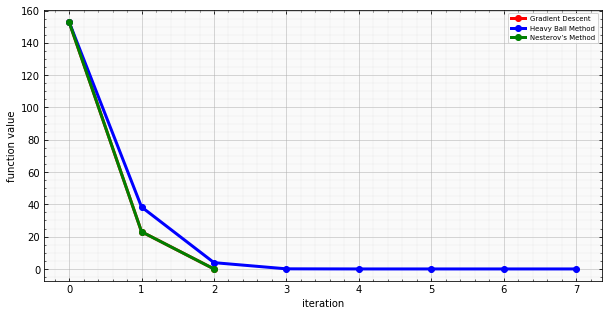

In [6]:
# Seems Nesterov's method has the same result with gradient descent?
# However, the gradient at each iteration is different
fid = plt.figure(figsize=(10,5))

Axes = plt.subplot(1,1,1)
Axes.axes.tick_params(which='both',direction='in',top=True, right=True)
plt.minorticks_on()
Axes.set_facecolor((0,0,0,0.02))

plt.plot(iterations_NM, values_NM, 'k-o', linewidth=3, color = 'r', label='Gradient Descent')
plt.plot(iterations_HBM, values_HBM, 'b-o', linewidth=3, label = 'Heavy Ball Method')
plt.plot(iterations_NM, values_NM, 'k-o', linewidth=3, color='g', label='Nesterov’s Method')
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel("iteration")
plt.ylabel("function value")
plt.legend(loc='upper right',fontsize='x-small')
plt.savefig('/Users/gexueren/Desktop/6270/assignment/hw04/hw04/3d.png')